<a href="https://colab.research.google.com/github/Shafiu1/BanglaBlog/blob/main/thesis_final_with_wf1_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install tensorflow torch==2.3.0 torchvision==0.18.0 transformers pillow numpy pandas scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.2/779.2 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 105.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 128.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 92.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 62.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.2/176.2 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
import os
folder_path = '/content/drive/MyDrive/BanglaNewsClassifier/'
print(os.listdir(folder_path))

['headlines.gsheet', 'Images', 'headlines.csv', 'train_images.pkl', 'val_images.pkl', 'test_images.pkl', 'best_model.h5', 'best_model_tuned.h5', 'best_model.pth', 'bangla_news_model.pth', 'text_news_model.pth', 'image_news_model.pth', 'multimodal_news_model.pth']


In [4]:
from google.colab import drive
import os

# Mount Google Drive
# drive.mount('/content/drive')

# Define paths
folder_path = '/content/drive/MyDrive/BanglaNewsClassifier/'
csv_path = '/content/drive/MyDrive/BanglaNewsClassifier/headlines.csv'
image_folder = '/content/drive/MyDrive/BanglaNewsClassifier/Images/'

# Verify folder contents
print("Contents of BanglaNewsClassifier:", os.listdir(folder_path))

# Check if CSV exists
if os.path.exists(csv_path):
    print("headlines.csv found!")
else:
    print("headlines.csv NOT found!")

# Check if image folder exists and list some images
if os.path.exists(image_folder):
    print("Images folder found! First 5 images:", os.listdir(image_folder)[:5])
else:
    print("Images folder NOT found!")

Contents of BanglaNewsClassifier: ['headlines.gsheet', 'Images', 'headlines.csv', 'train_images.pkl', 'val_images.pkl', 'test_images.pkl', 'best_model.h5', 'best_model_tuned.h5', 'best_model.pth', 'bangla_news_model.pth', 'text_news_model.pth', 'image_news_model.pth', 'multimodal_news_model.pth']
headlines.csv found!
Images folder found! First 5 images: ['3006.jpg', '3009.jpg', '3011.jpg', '3010.jpg', '3008.jpg']


In [5]:
jpg_files = [f for f in os.listdir(image_folder) if f.lower().endswith('.jpg')]
jpg_files.sort()  # Sort for consistency
total_images = len(jpg_files)

print(f"Total number of .jpg images: {total_images}")
if total_images == 4007:
    print("Confirmed: 4,007 images found!")
else:
    print(f"Warning: Expected 4,007 images, but found {total_images}!")
print("First 5 images:", jpg_files[:5])
print("Last 5 images:", jpg_files[-5:])

Total number of .jpg images: 4007
Confirmed: 4,007 images found!
First 5 images: ['0001.jpg', '0002.jpg', '0003.jpg', '0004.jpg', '0005.jpg']
Last 5 images: ['4003.jpg', '4004.jpg', '4005.jpg', '4006.jpg', '4007.jpg']


In [6]:
from google.colab import drive
import os
from collections import Counter

# Mount Google Drive
# drive.mount('/content/drive')

# Define image folder path
image_folder = '/content/drive/MyDrive/BanglaNewsClassifier/Images/'

# List .jpg files
jpg_files = [f for f in os.listdir(image_folder) if f.lower().endswith('.jpg')]
jpg_files.sort()
print(f"Total number of .jpg images: {len(jpg_files)}")

# Check for duplicate base names (ignoring suffixes like _copy or (1))
base_names = [f.split('.')[0].split('_')[0].split(' (')[0] for f in jpg_files]
name_counts = Counter(base_names)
duplicates = {name: count for name, count in name_counts.items() if count > 1}

if duplicates:
    print(f"Found {len(duplicates)} base names with duplicates:")
    for name, count in duplicates.items():
        print(f"Base name {name} appears {count} times")
        # List files with this base name
        matching_files = [f for f in jpg_files if f.startswith(name)]
        print(f"Files: {matching_files}")
else:
    print("No duplicate base names found!")

# Check for files beyond 4007.jpg
extra_files = [f for f in jpg_files if f[:-4].isdigit() and int(f[:-4]) > 4007]
print(f"Files beyond 4007.jpg: {len(extra_files)}")
if extra_files:
    print("Extra files:", extra_files[:5])

Total number of .jpg images: 4007
No duplicate base names found!
Files beyond 4007.jpg: 0


In [7]:
from google.colab import drive
import os
import pandas as pd
from PIL import Image

# Mount Google Drive
# drive.mount('/content/drive')

# Paths
csv_path = '/content/drive/MyDrive/BanglaNewsClassifier/headlines.csv'
image_folder = '/content/drive/MyDrive/BanglaNewsClassifier/Images/'

# Verify paths
if not os.path.exists(csv_path):
    raise FileNotFoundError(f"CSV not found at {csv_path}")
if not os.path.exists(image_folder):
    raise FileNotFoundError(f"Images folder not found at {image_folder}")

# Count .jpg files
jpg_files = [f for f in os.listdir(image_folder) if f.lower().endswith('.jpg')]
jpg_files.sort()
print(f"Total .jpg images: {len(jpg_files)}")
print("First 5 images:", jpg_files[:5])
print("Last 5 images:", jpg_files[-5:])

# Check for duplicates
from collections import Counter
base_names = [f.split('.')[0].split('_')[0].split(' (')[0] for f in jpg_files]
name_counts = Counter(base_names)
duplicates = {name: count for name, count in name_counts.items() if count > 1}
if duplicates:
    print(f"Found {len(duplicates)} duplicate base names:")
    for name, count in duplicates.items():
        print(f"Base name {name} appears {count} times: {[f for f in jpg_files if f.startswith(name)]}")
else:
    print("No duplicate base names found!")

# Load CSV
df = pd.read_csv(csv_path)
print(f"Total rows in CSV: {len(df)}")
print("CSV head:", df.head())

# Map image paths
df['full_image_path'] = df['Image_Path'].apply(lambda x: f"{image_folder}{x}.jpg")

# Check missing files
missing_files = [path for path in df['full_image_path'] if not os.path.exists(path)]
print(f"Missing files: {len(missing_files)}")
if missing_files:
    print("Missing files (first 5):", missing_files[:5])

# Check unreadable files
def test_image(image_path):
    try:
        img = Image.open(image_path).convert('RGB')
        img.verify()
        return True
    except Exception as e:
        print(f"Error with {image_path}: {e}")
        return False

unreadable_files = [path for path in df['full_image_path'] if os.path.exists(path) and not test_image(path)]
print(f"Unreadable files: {len(unreadable_files)}")
if unreadable_files:
    print("Unreadable files (first 5):", unreadable_files[:5])

# Filter valid samples
df = df[df['full_image_path'].apply(lambda x: os.path.exists(x) and test_image(x))]
# df = df.drop_duplicates(subset=['Image_Path'])
print(f"Valid samples after filtering: {len(df)}")

Total .jpg images: 4007
First 5 images: ['0001.jpg', '0002.jpg', '0003.jpg', '0004.jpg', '0005.jpg']
Last 5 images: ['4003.jpg', '4004.jpg', '4005.jpg', '4006.jpg', '4007.jpg']
No duplicate base names found!
Total rows in CSV: 4007
CSV head:                                      Heading(Bangla) Image_Path  \
0  সরকারে থেকে যদি দল গঠন করেন, এ দেশের মানুষ মেন...   0001.jpg   
1  টাকা না পাওয়ায় দেশে ফিরতে পারছেন না রাজশাহীর ব...   0002.jpg   
2  তারকা ফুটবলারদের সৌদি যাওয়া ঠেকাতে বার্সেলোনার...   0003.jpg   
3  নারী ফুটবলারদের পাশে দাঁড়ান; তাঁরা শুধু নিজেরা...   0004.jpg   
4                     অনেক বিরহ হলো, এবার অ্যাকশন...   0005.jpg   

  Category(Bangla)             English             Bangla  
0          রাজনীতি            Politics            রাজনীতি  
1         খেলাধুলা              Sports           খেলাধুলা  
2         খেলাধুলা  Economy & Business  অর্থনীতি ও ব্যবসা  
3         খেলাধুলা       Entertainment             বিনোদন  
4           বিনোদন          Technology          প্রযুক্

In [8]:
from google.colab import drive
import os
import pandas as pd
from PIL import Image

# Mount Google Drive
drive.mount('/content/drive')

# Paths
csv_path = '/content/drive/MyDrive/BanglaNewsClassifier/headlines.csv'
image_folder = '/content/drive/MyDrive/BanglaNewsClassifier/Images/'

# Verify paths
if not os.path.exists(csv_path):
    raise FileNotFoundError(f"CSV not found at {csv_path}")
if not os.path.exists(image_folder):
    raise FileNotFoundError(f"Images folder not found at {image_folder}")

# Count .jpg files
jpg_files = [f for f in os.listdir(image_folder) if f.lower().endswith('.jpg')]
jpg_files.sort()
print(f"Total .jpg images: {len(jpg_files)}")
print("First 5 images:", jpg_files[:5])
print("Last 5 images:", jpg_files[-5:])

# Check for duplicates
from collections import Counter
base_names = [f.split('.')[0].split('_')[0].split(' (')[0] for f in jpg_files]
name_counts = Counter(base_names)
duplicates = {name: count for name, count in name_counts.items() if count > 1}
if duplicates:
    print(f"Found {len(duplicates)} duplicate base names:")
    for name, count in duplicates.items():
        print(f"Base name {name} appears {count} times: {[f for f in jpg_files if f.startswith(name)]}")
else:
    print("No duplicate base names found!")

# Load CSV
df = pd.read_csv(csv_path)
print(f"Total rows in CSV: {len(df)}")
print("CSV head:", df.head())
print("CSV columns:", df.columns.tolist())

# Map image paths
df['full_image_path'] = df['Image_Path'].apply(lambda x: f"{image_folder}{x}")

# Check missing files
missing_files = [path for path in df['full_image_path'] if not os.path.exists(path)]
print(f"Missing files: {len(missing_files)}")
if missing_files:
    print("Missing files (first 5):", missing_files[:5])

# Check unreadable files
def test_image(image_path):
    try:
        img = Image.open(image_path).convert('RGB')
        img.verify()
        return True
    except Exception as e:
        print(f"Error with {image_path}: {e}")
        return False

unreadable_files = [path for path in df['full_image_path'] if os.path.exists(path) and not test_image(path)]
print(f"Unreadable files: {len(unreadable_files)}")
if unreadable_files:
    print("Unreadable files (first 5):", unreadable_files[:5])

# Filter valid samples
df = df[df['full_image_path'].apply(lambda x: os.path.exists(x) and test_image(x))]
df = df.drop_duplicates(subset=['Image_Path'])
print(f"Valid samples after filtering: {len(df)}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Total .jpg images: 4007
First 5 images: ['0001.jpg', '0002.jpg', '0003.jpg', '0004.jpg', '0005.jpg']
Last 5 images: ['4003.jpg', '4004.jpg', '4005.jpg', '4006.jpg', '4007.jpg']
No duplicate base names found!
Total rows in CSV: 4007
CSV head:                                      Heading(Bangla) Image_Path  \
0  সরকারে থেকে যদি দল গঠন করেন, এ দেশের মানুষ মেন...   0001.jpg   
1  টাকা না পাওয়ায় দেশে ফিরতে পারছেন না রাজশাহীর ব...   0002.jpg   
2  তারকা ফুটবলারদের সৌদি যাওয়া ঠেকাতে বার্সেলোনার...   0003.jpg   
3  নারী ফুটবলারদের পাশে দাঁড়ান; তাঁরা শুধু নিজেরা...   0004.jpg   
4                     অনেক বিরহ হলো, এবার অ্যাকশন...   0005.jpg   

  Category(Bangla)             English             Bangla  
0          রাজনীতি            Politics            রাজনীতি  
1         খেলাধুলা              Sports           খেলাধুলা  
2         খেলাধুলা  Economy & Business  অর্থনী

In [9]:
from google.colab import drive
import os
import pandas as pd
from PIL import Image

# Mount Google Drive
drive.mount('/content/drive')

# Paths
csv_path = '/content/drive/MyDrive/BanglaNewsClassifier/headlines.csv'
image_folder = '/content/drive/MyDrive/BanglaNewsClassifier/Images/'

# Verify paths
if not os.path.exists(csv_path):
    raise FileNotFoundError(f"CSV not found at {csv_path}")
if not os.path.exists(image_folder):
    raise FileNotFoundError(f"Images folder not found at {image_folder}")

# Count .jpg files
jpg_files = [f for f in os.listdir(image_folder) if f.lower().endswith('.jpg')]
jpg_files.sort()
print(f"Total .jpg images: {len(jpg_files)}")
print("First 5 images:", jpg_files[:5])
print("Last 5 images:", jpg_files[-5:])

# Check for duplicates
from collections import Counter
base_names = [f.split('.')[0].split('_')[0].split(' (')[0] for f in jpg_files]
name_counts = Counter(base_names)
duplicates = {name: count for name, count in name_counts.items() if count > 1}
if duplicates:
    print(f"Found {len(duplicates)} duplicate base names:")
    for name, count in duplicates.items():
        print(f"Base name {name} appears {count} times: {[f for f in jpg_files if f.startswith(name)]}")
else:
    print("No duplicate base names found!")

# Load CSV
df = pd.read_csv(csv_path)
print(f"Total rows in CSV: {len(df)}")
print("CSV head:", df.head())
print("CSV columns:", df.columns.tolist())

# Map image paths
df['full_image_path'] = df['Image_Path'].apply(lambda x: f"{image_folder}{x}")

# Check missing files
missing_files = [path for path in df['full_image_path'] if not os.path.exists(path)]
print(f"Missing files: {len(missing_files)}")
if missing_files:
    print("Missing files (first 5):", missing_files[:5])

# Filter valid samples
df = df[df['full_image_path'].apply(lambda x: os.path.exists(x) and test_image(x))]
df = df.drop_duplicates(subset=['Image_Path'])
print(f"Valid samples after filtering: {len(df)}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Total .jpg images: 4007
First 5 images: ['0001.jpg', '0002.jpg', '0003.jpg', '0004.jpg', '0005.jpg']
Last 5 images: ['4003.jpg', '4004.jpg', '4005.jpg', '4006.jpg', '4007.jpg']
No duplicate base names found!
Total rows in CSV: 4007
CSV head:                                      Heading(Bangla) Image_Path  \
0  সরকারে থেকে যদি দল গঠন করেন, এ দেশের মানুষ মেন...   0001.jpg   
1  টাকা না পাওয়ায় দেশে ফিরতে পারছেন না রাজশাহীর ব...   0002.jpg   
2  তারকা ফুটবলারদের সৌদি যাওয়া ঠেকাতে বার্সেলোনার...   0003.jpg   
3  নারী ফুটবলারদের পাশে দাঁড়ান; তাঁরা শুধু নিজেরা...   0004.jpg   
4                     অনেক বিরহ হলো, এবার অ্যাকশন...   0005.jpg   

  Category(Bangla)             English             Bangla  
0          রাজনীতি            Politics            রাজনীতি  
1         খেলাধুলা              Sports           খেলাধুলা  
2         খেলাধুলা  Economy & Business  অর্থনী

#Testing Weighted F-1

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Valid samples: 4007


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/491 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Display classes (English): ['Economy & Business', 'Sports', 'Technology', 'Entertainment', 'Politics', 'Health & Lifestyle']


model.safetensors:   0%|          | 0.00/660M [00:00<?, ?B/s]

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 192MB/s]
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


Epoch 1:
Train Loss: 0.2217, Val Loss: 0.4259
Train Acc: 0.9354, Val Acc: 0.8636
Train F1: 0.9359, Val F1: 0.8640
Epoch 2:
Train Loss: 0.0546, Val Loss: 0.3095
Train Acc: 0.9893, Val Acc: 0.9002
Train F1: 0.9893, Val F1: 0.9003
Epoch 3:
Train Loss: 0.0256, Val Loss: 0.3262
Train Acc: 0.9968, Val Acc: 0.9101
Train F1: 0.9968, Val F1: 0.9087
Epoch 4:
Train Loss: 0.0124, Val Loss: 0.3484
Train Acc: 0.9975, Val Acc: 0.9052
Train F1: 0.9975, Val F1: 0.9043
Epoch 5:
Train Loss: 0.0079, Val Loss: 0.3743
Train Acc: 0.9989, Val Acc: 0.9101
Train F1: 0.9989, Val F1: 0.9091


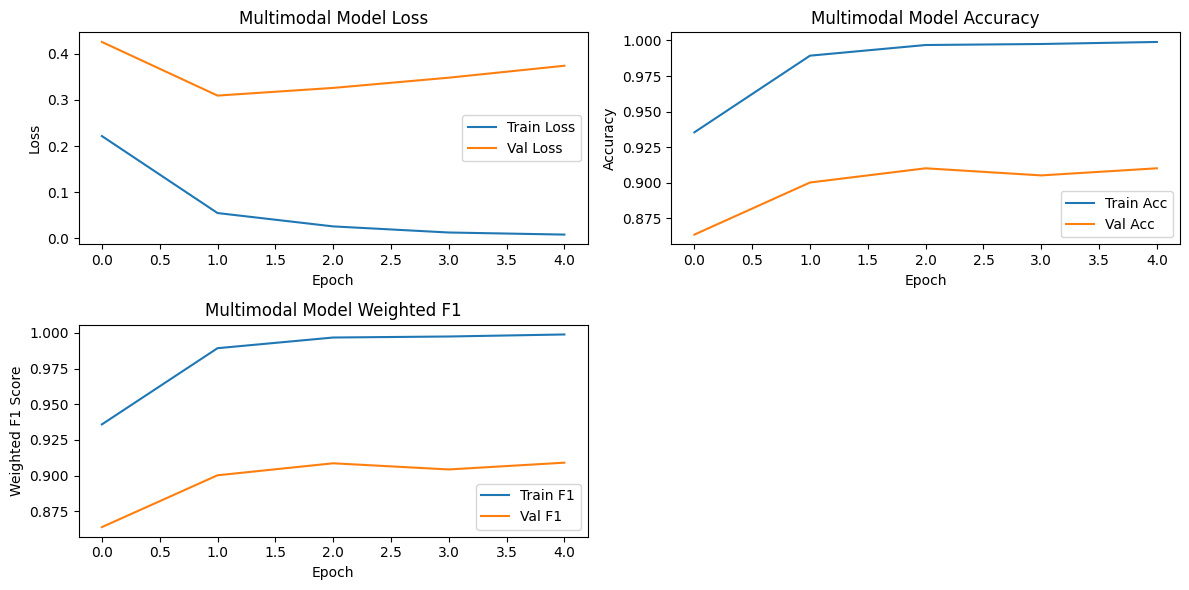

Test Accuracy: 0.9319
Test Weighted F1 Score: 0.9318
Classification Report:
                    precision    recall  f1-score   support

Economy & Business       0.92      0.92      0.92       105
            Sports       0.94      0.97      0.95        93
        Technology       0.91      0.91      0.91       115
     Entertainment       0.92      0.91      0.92        90
          Politics       0.95      0.96      0.96       105
Health & Lifestyle       0.95      0.91      0.93        94

          accuracy                           0.93       602
         macro avg       0.93      0.93      0.93       602
      weighted avg       0.93      0.93      0.93       602



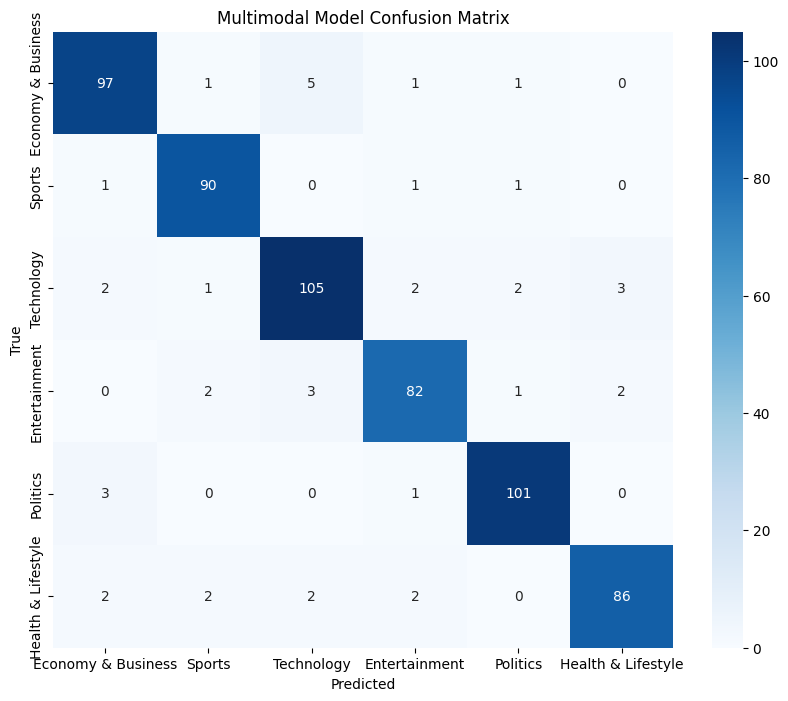

Model saved!


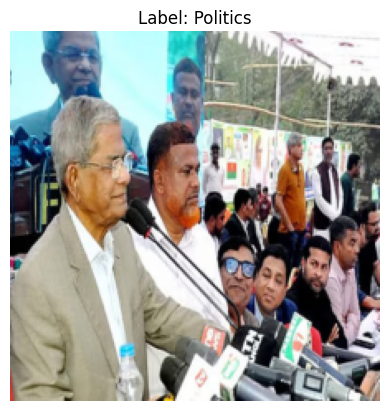

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from transformers import AutoTokenizer, AutoModel
from PIL import Image
import torchvision.transforms as transforms
import torchvision.models as models
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import Dataset, DataLoader, random_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import drive
import pandas as pd
import os

# Mount Google Drive (comment out if already mounted)
drive.mount('/content/drive')

# Paths
csv_path = '/content/drive/MyDrive/BanglaNewsClassifier/headlines.csv'
image_folder = '/content/drive/MyDrive/BanglaNewsClassifier/Images/'

# Load and filter CSV
df = pd.read_csv(csv_path)
df['full_image_path'] = df['Image_Path'].apply(lambda x: f"{image_folder}{x}")

def test_image(image_path):
    try:
        img = Image.open(image_path).convert('RGB')
        img.verify()
        return True
    except:
        return False

df = df[df['full_image_path'].apply(lambda x: os.path.exists(x) and test_image(x))]
df = df.drop_duplicates(subset=['Image_Path'])
print(f"Valid samples: {len(df)}")

# Preprocess data
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Text preprocessing
tokenizer = AutoTokenizer.from_pretrained('sagorsarker/bangla-bert-base')
tokenized_headlines = tokenizer(df['Heading(Bangla)'].tolist(), padding=True, truncation=True, max_length=128, return_tensors='pt')

# Labels
le = LabelEncoder()
labels = le.fit_transform(df['Category(Bangla)'])
labels = torch.tensor(labels, dtype=torch.long)

# Map Bangla categories to English for display
category_mapping = {
    'রাজনীতি': 'Politics',
    'খেলাধুলা': 'Sports',
    'অর্থনীতি ও বাণিজ্য': 'Economy & Business',
    'বিনোদন': 'Entertainment',
    'প্রযুক্তি': 'Technology',
    'স্বাস্থ্য ও জীবনযাপন': 'Health & Lifestyle'
}
le_classes = [category_mapping.get(cls, cls) for cls in le.classes_]
print("Display classes (English):", le_classes)

# Dataset
class BanglaNewsDataset(Dataset):
    def __init__(self, tokenized_headlines, image_paths, labels, transform):
        self.input_ids = tokenized_headlines['input_ids']
        self.attention_mask = tokenized_headlines['attention_mask']
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        img = Image.open(self.image_paths[idx]).convert('RGB')
        img = self.transform(img)
        return {
            'input_ids': self.input_ids[idx],
            'attention_mask': self.attention_mask[idx],
            'images': img,
            'labels': self.labels[idx]
        }

# Split dataset into 70% train, 15% validation, 15% test
dataset = BanglaNewsDataset(tokenized_headlines, df['full_image_path'].tolist(), labels, transform)
train_size = int(0.7 * len(dataset))
val_size = int(0.15 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=8 if len(df) > 1000 else 4, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8 if len(df) > 1000 else 4)
test_loader = DataLoader(test_dataset, batch_size=8 if len(df) > 1000 else 4)

# Model
class MultimodalNewsClassifier(nn.Module):
    def __init__(self, num_classes):
        super(MultimodalNewsClassifier, self).__init__()
        self.text_model = AutoModel.from_pretrained('sagorsarker/bangla-bert-base')
        self.image_model = models.resnet18(weights='IMAGENET1K_V1')
        self.image_model.fc = nn.Linear(self.image_model.fc.in_features, 512)
        self.fusion = nn.Linear(768 + 512, 256)
        self.dropout = nn.Dropout(0.3)
        self.classifier = nn.Linear(256, num_classes)

    def forward(self, input_ids, attention_mask, images):
        text_outputs = self.text_model(input_ids=input_ids, attention_mask=attention_mask)
        text_features = text_outputs.pooler_output
        image_features = self.image_model(images)
        combined = torch.cat((text_features, image_features), dim=1)
        fused = torch.relu(self.fusion(combined))
        fused = self.dropout(fused)
        logits = self.classifier(fused)
        return logits

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = MultimodalNewsClassifier(num_classes=len(le.classes_)).to(device)

# Training
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=2e-5)

def train_epoch(model, data_loader, criterion, optimizer, device):
    model.train()
    total_loss = 0
    for batch in data_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        images = batch['images'].to(device)
        labels = batch['labels'].to(device)
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask, images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(data_loader)

def evaluate(model, data_loader, criterion, device, return_preds=False):
    model.eval()
    total_loss = 0
    correct = 0
    total = 0
    preds_all, labels_all = [], []
    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            images = batch['images'].to(device)
            labels = batch['labels'].to(device)
            outputs = model(input_ids, attention_mask, images)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            _, preds = torch.max(outputs, dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
            preds_all.extend(preds.cpu().numpy())
            labels_all.extend(labels.cpu().numpy())
    accuracy = correct / total
    avg_loss = total_loss / len(data_loader)
    weighted_f1 = f1_score(labels_all, preds_all, average='weighted')
    if return_preds:
        return avg_loss, accuracy, weighted_f1, preds_all, labels_all
    return avg_loss, accuracy, weighted_f1

# Training loop with validation
train_losses, val_losses = [], []
train_accs, val_accs, train_f1s, val_f1s = [], [], [], []

for epoch in range(5 if len(df) > 1000 else 10):
    train_loss = train_epoch(model, train_loader, criterion, optimizer, device)
    val_loss, val_acc, val_f1 = evaluate(model, val_loader, criterion, device)

    train_loss, train_acc, train_f1 = evaluate(model, train_loader, criterion, device)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accs.append(train_acc)
    val_accs.append(val_acc)
    train_f1s.append(train_f1)
    val_f1s.append(val_f1)

    print(f"Epoch {epoch+1}:")
    print(f"Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")
    print(f"Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}")
    print(f"Train F1: {train_f1:.4f}, Val F1: {val_f1:.4f}")

# Plot training curves
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Multimodal Model Loss')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(train_accs, label='Train Acc')
plt.plot(val_accs, label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Multimodal Model Accuracy')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(train_f1s, label='Train F1')
plt.plot(val_f1s, label='Val F1')
plt.xlabel('Epoch')
plt.ylabel('Weighted F1 Score')
plt.title('Multimodal Model Weighted F1')
plt.legend()
plt.tight_layout()
plt.show()

# Test evaluation
test_loss, test_acc, test_f1, preds, true_labels = evaluate(model, test_loader, criterion, device, return_preds=True)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Weighted F1 Score: {test_f1:.4f}")
print("Classification Report:")
print(classification_report(true_labels, preds, target_names=le_classes))

# Confusion Matrix
cm = confusion_matrix(true_labels, preds)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le_classes, yticklabels=le_classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Multimodal Model Confusion Matrix')
plt.show()

# Save Model
torch.save(model.state_dict(), '/content/drive/MyDrive/BanglaNewsClassifier/multimodal_news_model.pth')
print("Model saved!")

# Visualize Sample
def show_image(image_path, idx):
    img = Image.open(image_path).convert('RGB')
    img = transform(img).permute(1, 2, 0)
    img = img * torch.tensor([0.229, 0.224, 0.225]) + torch.tensor([0.485, 0.456, 0.406])
    plt.imshow(img.clip(0, 1))
    bangla_label = le.inverse_transform([labels[idx]])[0]
    english_label = category_mapping.get(bangla_label, bangla_label)
    plt.title(f"Label: {english_label}")
    plt.axis('off')
    plt.show()

show_image(df['full_image_path'].iloc[0], 0)

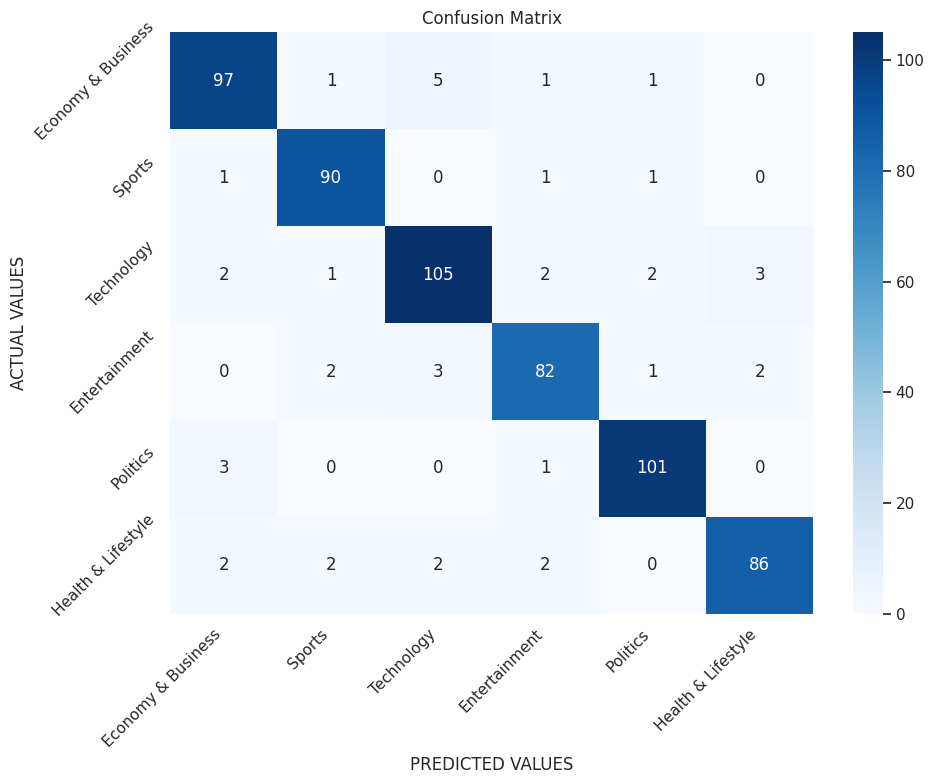

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style correctly
sns.set_theme(style="whitegrid")  # ✅ Correct way to apply the theme

cm = confusion_matrix(true_labels, preds)

plt.figure(figsize=(10, 8), facecolor='white')  # Set figure background
ax = sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=le_classes,
    yticklabels=le_classes
)

ax.set_facecolor('white')  # Set axes (plot) background

plt.xlabel('PREDICTED VALUES')
plt.ylabel('ACTUAL VALUES')
plt.title('Confusion Matrix')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()


##XML-RoBERTa


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Valid samples: 4007


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

Display classes (English): ['Economy & Business', 'Sports', 'Technology', 'Entertainment', 'Politics', 'Health & Lifestyle']


model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 144MB/s]
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


Epoch 1:
Train Loss: 0.9546, Val Loss: 0.3952
Train Acc: 0.9269, Val Acc: 0.8869
Epoch 2:
Train Loss: 0.3388, Val Loss: 0.2638
Train Acc: 0.9750, Val Acc: 0.9151
Epoch 3:
Train Loss: 0.1951, Val Loss: 0.2456
Train Acc: 0.9847, Val Acc: 0.9218
Epoch 4:
Train Loss: 0.1438, Val Loss: 0.2815
Train Acc: 0.9904, Val Acc: 0.9168
Epoch 5:
Train Loss: 0.0701, Val Loss: 0.2251
Train Acc: 0.9975, Val Acc: 0.9285


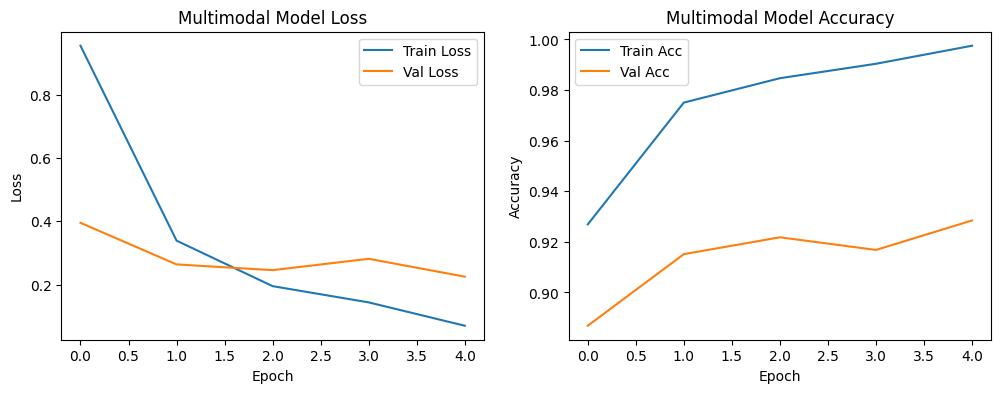

Test Accuracy: 0.9153
Classification Report:
                    precision    recall  f1-score   support

Economy & Business       0.92      0.88      0.90        95
            Sports       0.95      0.94      0.95       121
        Technology       0.88      0.92      0.90        93
     Entertainment       0.91      0.91      0.91        89
          Politics       0.92      0.91      0.92        93
Health & Lifestyle       0.90      0.91      0.91       111

          accuracy                           0.92       602
         macro avg       0.91      0.91      0.91       602
      weighted avg       0.92      0.92      0.92       602



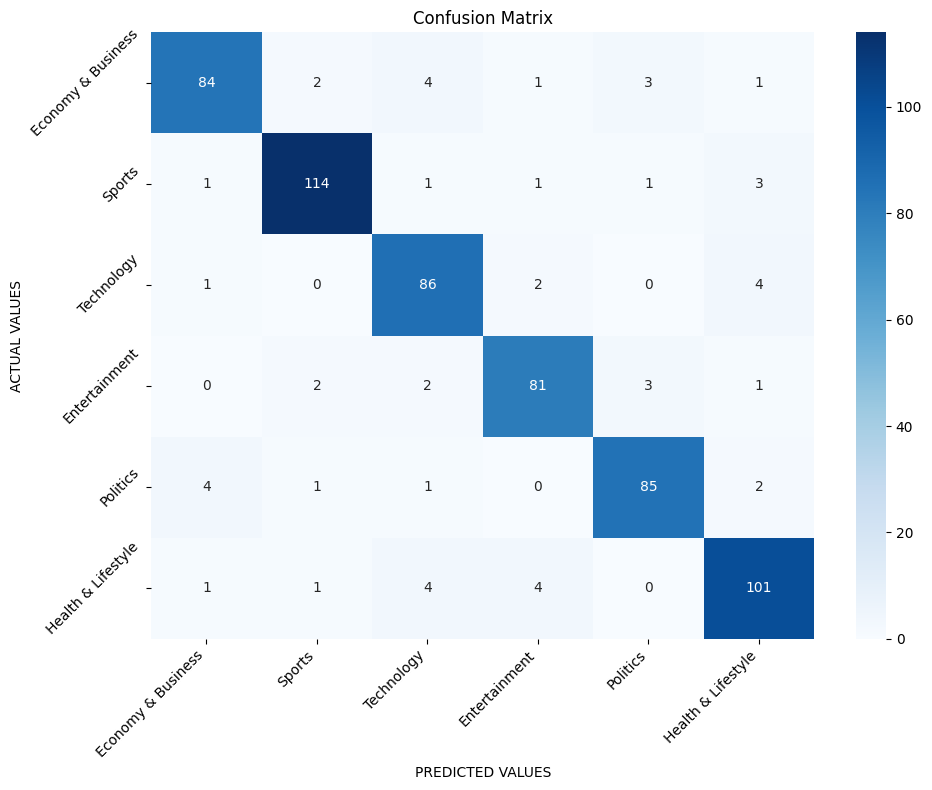

Model saved!


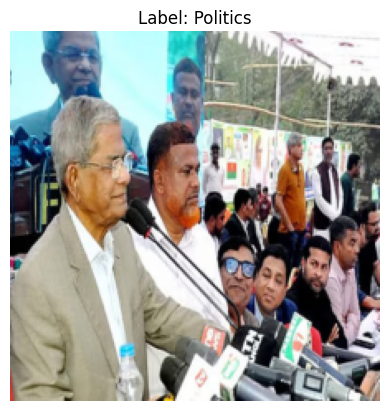

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from transformers import AutoTokenizer, AutoModel
from PIL import Image
import torchvision.transforms as transforms
import torchvision.models as models
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import Dataset, DataLoader, random_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import drive
import pandas as pd
import os

# Mount Google Drive (comment out if already mounted)
drive.mount('/content/drive')

# Paths
csv_path = '/content/drive/MyDrive/BanglaNewsClassifier/headlines.csv'
image_folder = '/content/drive/MyDrive/BanglaNewsClassifier/Images/'

# Load and filter CSV
df = pd.read_csv(csv_path)
df['full_image_path'] = df['Image_Path'].apply(lambda x: f"{image_folder}{x}")

def test_image(image_path):
    try:
        img = Image.open(image_path).convert('RGB')
        img.verify()
        return True
    except:
        return False

df = df[df['full_image_path'].apply(lambda x: os.path.exists(x) and test_image(x))]
df = df.drop_duplicates(subset=['Image_Path'])
print(f"Valid samples: {len(df)}")

# Preprocess data
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Text preprocessing with XML-RoBERTa
tokenizer = AutoTokenizer.from_pretrained('xlm-roberta-base')
tokenized_headlines = tokenizer(df['Heading(Bangla)'].tolist(), padding=True, truncation=True, max_length=128, return_tensors='pt')

# Labels
le = LabelEncoder()
labels = le.fit_transform(df['Category(Bangla)'])
labels = torch.tensor(labels, dtype=torch.long)

# Map Bangla categories to English for display
category_mapping = {
    'রাজনীতি': 'Politics',
    'খেলাধুলা': 'Sports',
    'অর্থনীতি ও বাণিজ্য': 'Economy & Business',
    'বিনোদন': 'Entertainment',
    'প্রযুক্তি': 'Technology',
    'স্বাস্থ্য ও জীবনযাপন': 'Health & Lifestyle'
}
le_classes = [category_mapping.get(cls, cls) for cls in le.classes_]
print("Display classes (English):", le_classes)

# Dataset
class BanglaNewsDataset(Dataset):
    def __init__(self, tokenized_headlines, image_paths, labels, transform):
        self.input_ids = tokenized_headlines['input_ids']
        self.attention_mask = tokenized_headlines['attention_mask']
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        img = Image.open(self.image_paths[idx]).convert('RGB')
        img = self.transform(img)
        return {
            'input_ids': self.input_ids[idx],
            'attention_mask': self.attention_mask[idx],
            'images': img,
            'labels': self.labels[idx]
        }

# Split dataset into 70% train, 15% validation, 15% test
dataset = BanglaNewsDataset(tokenized_headlines, df['full_image_path'].tolist(), labels, transform)
train_size = int(0.7 * len(dataset))
val_size = int(0.15 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=8 if len(df) > 1000 else 4, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8 if len(df) > 1000 else 4)
test_loader = DataLoader(test_dataset, batch_size=8 if len(df) > 1000 else 4)

# Model
class MultimodalNewsClassifier(nn.Module):
    def __init__(self, num_classes):
        super(MultimodalNewsClassifier, self).__init__()
        self.text_model = AutoModel.from_pretrained('xlm-roberta-base')
        self.image_model = models.resnet18(weights='IMAGENET1K_V1')
        self.image_model.fc = nn.Linear(self.image_model.fc.in_features, 512)
        self.fusion = nn.Linear(768 + 512, 256)  # XML-RoBERTa output is 768 dimensions
        self.dropout = nn.Dropout(0.3)
        self.classifier = nn.Linear(256, num_classes)

    def forward(self, input_ids, attention_mask, images):
        text_outputs = self.text_model(input_ids=input_ids, attention_mask=attention_mask)
        text_features = text_outputs.pooler_output
        image_features = self.image_model(images)
        combined = torch.cat((text_features, image_features), dim=1)
        fused = torch.relu(self.fusion(combined))
        fused = self.dropout(fused)
        logits = self.classifier(fused)
        return logits

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = MultimodalNewsClassifier(num_classes=len(le.classes_)).to(device)

# Training
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=2e-5)

def train_epoch(model, data_loader, criterion, optimizer, device):
    model.train()
    total_loss = 0
    for batch in data_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        images = batch['images'].to(device)
        labels = batch['labels'].to(device)
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask, images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(data_loader)

def evaluate(model, data_loader, criterion, device, return_preds=False):
    model.eval()
    total_loss = 0
    correct = 0
    total = 0
    preds_all, labels_all = [], []
    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            images = batch['images'].to(device)
            labels = batch['labels'].to(device)
            outputs = model(input_ids, attention_mask, images)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            _, preds = torch.max(outputs, dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
            preds_all.extend(preds.cpu().numpy())
            labels_all.extend(labels.cpu().numpy())
    accuracy = correct / total
    avg_loss = total_loss / len(data_loader)
    if return_preds:
        return avg_loss, accuracy, preds_all, labels_all
    return avg_loss, accuracy

# Training loop with validation
train_losses, val_losses = [], []
train_accs, val_accs = [], []

for epoch in range(5 if len(df) > 1000 else 10):
    train_loss = train_epoch(model, train_loader, criterion, optimizer, device)
    val_loss, val_acc = evaluate(model, val_loader, criterion, device)

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accs.append(evaluate(model, train_loader, criterion, device)[1])
    val_accs.append(val_acc)

    print(f"Epoch {epoch+1}:")
    print(f"Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")
    print(f"Train Acc: {train_accs[-1]:.4f}, Val Acc: {val_acc:.4f}")

# Plot training curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Multimodal Model Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accs, label='Train Acc')
plt.plot(val_accs, label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Multimodal Model Accuracy')
plt.legend()
plt.show()

# Test evaluation
test_loss, test_acc, preds, true_labels = evaluate(model, test_loader, criterion, device, return_preds=True)
print(f"Test Accuracy: {test_acc:.4f}")
print("Classification Report:")
print(classification_report(true_labels, preds, target_names=le_classes))

# Confusion Matrix
cm = confusion_matrix(true_labels, preds)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le_classes, yticklabels=le_classes)
plt.xlabel('PREDICTED VALUES')
plt.ylabel('ACTUAL VALUES')
plt.title('Confusion Matrix')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels by 45 degrees
plt.yticks(rotation=45)  # Rotate y-axis labels by 45 degrees
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

# Save Model
torch.save(model.state_dict(), '/content/drive/MyDrive/BanglaNewsClassifier/multimodal_news_model.pth')
print("Model saved!")

# Visualize Sample
def show_image(image_path, idx):
    img = Image.open(image_path).convert('RGB')
    img = transform(img).permute(1, 2, 0)
    img = img * torch.tensor([0.229, 0.224, 0.225]) + torch.tensor([0.485, 0.456, 0.406])
    plt.imshow(img.clip(0, 1))
    bangla_label = le.inverse_transform([labels[idx]])[0]
    english_label = category_mapping.get(bangla_label, bangla_label)
    plt.title(f"Label: {english_label}")
    plt.axis('off')
    plt.show()

show_image(df['full_image_path'].iloc[0], 0)

##VGG16

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Valid samples: 4007


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/491 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Display classes (English): ['Economy & Business', 'Sports', 'Technology', 'Entertainment', 'Politics', 'Health & Lifestyle']


model.safetensors:   0%|          | 0.00/660M [00:00<?, ?B/s]

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:07<00:00, 71.4MB/s]


Epoch 1:
Train Loss: 0.7357, Val Loss: 0.3095
Train Acc: 0.9486, Val Acc: 0.9035
Epoch 2:
Train Loss: 0.1782, Val Loss: 0.2831
Train Acc: 0.9797, Val Acc: 0.9068
Epoch 3:
Train Loss: 0.0727, Val Loss: 0.2627
Train Acc: 0.9954, Val Acc: 0.9235
Epoch 4:
Train Loss: 0.0319, Val Loss: 0.3011
Train Acc: 0.9968, Val Acc: 0.9168
Epoch 5:
Train Loss: 0.0323, Val Loss: 0.3347
Train Acc: 0.9954, Val Acc: 0.9168


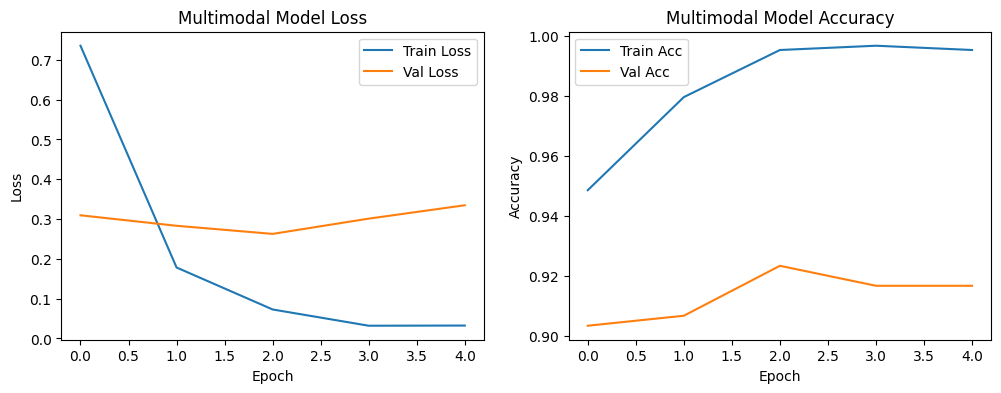

Test Accuracy: 0.8804
Classification Report:
                    precision    recall  f1-score   support

Economy & Business       0.94      0.87      0.90       106
            Sports       0.98      0.90      0.94       105
        Technology       0.94      0.88      0.91       108
     Entertainment       0.67      0.97      0.79        89
          Politics       0.90      0.95      0.92       103
Health & Lifestyle       0.93      0.70      0.80        91

          accuracy                           0.88       602
         macro avg       0.89      0.88      0.88       602
      weighted avg       0.90      0.88      0.88       602



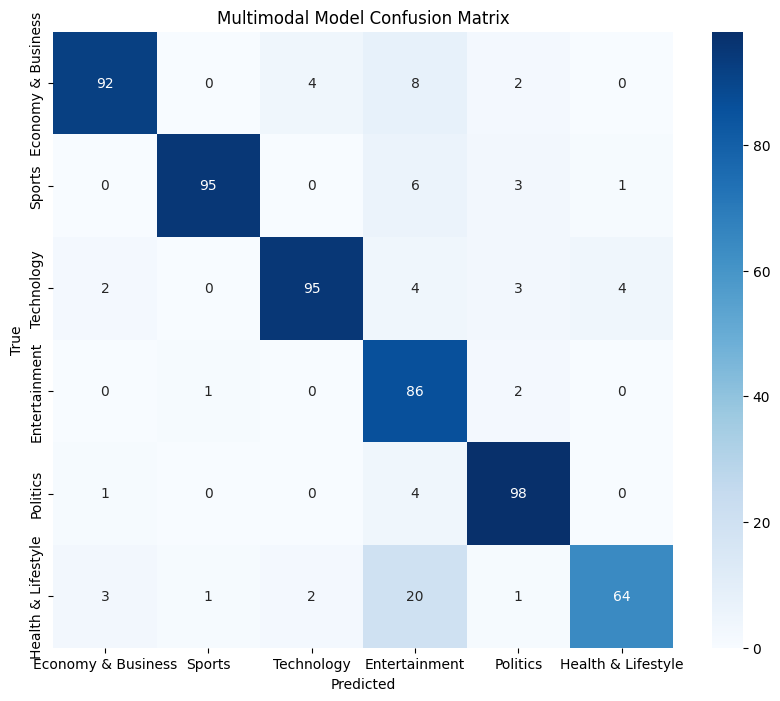

Model saved!


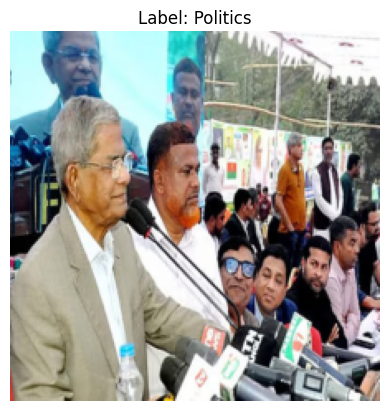

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from transformers import AutoTokenizer, AutoModel
from PIL import Image
import torchvision.transforms as transforms
import torchvision.models as models
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import Dataset, DataLoader, random_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import drive
import pandas as pd
import os

# Mount Google Drive (comment out if already mounted)
drive.mount('/content/drive')

# Paths
csv_path = '/content/drive/MyDrive/BanglaNewsClassifier/headlines.csv'
image_folder = '/content/drive/MyDrive/BanglaNewsClassifier/Images/'

# Load and filter CSV
df = pd.read_csv(csv_path)
df['full_image_path'] = df['Image_Path'].apply(lambda x: f"{image_folder}{x}")

def test_image(image_path):
    try:
        img = Image.open(image_path).convert('RGB')
        img.verify()
        return True
    except:
        return False

df = df[df['full_image_path'].apply(lambda x: os.path.exists(x) and test_image(x))]
df = df.drop_duplicates(subset=['Image_Path'])
print(f"Valid samples: {len(df)}")

# Preprocess data
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Text preprocessing
tokenizer = AutoTokenizer.from_pretrained('sagorsarker/bangla-bert-base')
tokenized_headlines = tokenizer(df['Heading(Bangla)'].tolist(), padding=True, truncation=True, max_length=128, return_tensors='pt')

# Labels
le = LabelEncoder()
labels = le.fit_transform(df['Category(Bangla)'])
labels = torch.tensor(labels, dtype=torch.long)

# Map Bangla categories to English for display
category_mapping = {
    'রাজনীতি': 'Politics',
    'খেলাধুলা': 'Sports',
    'অর্থনীতি ও বাণিজ্য': 'Economy & Business',
    'বিনোদন': 'Entertainment',
    'প্রযুক্তি': 'Technology',
    'স্বাস্থ্য ও জীবনযাপন': 'Health & Lifestyle'
}
le_classes = [category_mapping.get(cls, cls) for cls in le.classes_]
print("Display classes (English):", le_classes)

# Dataset
class BanglaNewsDataset(Dataset):
    def __init__(self, tokenized_headlines, image_paths, labels, transform):
        self.input_ids = tokenized_headlines['input_ids']
        self.attention_mask = tokenized_headlines['attention_mask']
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        img = Image.open(self.image_paths[idx]).convert('RGB')
        img = self.transform(img)
        return {
            'input_ids': self.input_ids[idx],
            'attention_mask': self.attention_mask[idx],
            'images': img,
            'labels': self.labels[idx]
        }

# Split dataset into 70% train, 15% validation, 15% test
dataset = BanglaNewsDataset(tokenized_headlines, df['full_image_path'].tolist(), labels, transform)
train_size = int(0.7 * len(dataset))
val_size = int(0.15 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=8 if len(df) > 1000 else 4, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8 if len(df) > 1000 else 4)
test_loader = DataLoader(test_dataset, batch_size=8 if len(df) > 1000 else 4)

# Model
class MultimodalNewsClassifier(nn.Module):
    def __init__(self, num_classes):
        super(MultimodalNewsClassifier, self).__init__()
        self.text_model = AutoModel.from_pretrained('sagorsarker/bangla-bert-base')
        self.image_model = models.vgg16(weights='IMAGENET1K_V1')  # Replace ResNet18 with VGG16
        self.image_model.classifier[6] = nn.Linear(4096, 512)  # Adjust final layer to 512
        self.fusion = nn.Linear(768 + 512, 256)
        self.dropout = nn.Dropout(0.3)
        self.classifier = nn.Linear(256, num_classes)

    def forward(self, input_ids, attention_mask, images):
        text_outputs = self.text_model(input_ids=input_ids, attention_mask=attention_mask)
        text_features = text_outputs.pooler_output
        image_features = self.image_model(images)
        combined = torch.cat((text_features, image_features), dim=1)
        fused = torch.relu(self.fusion(combined))
        fused = self.dropout(fused)
        logits = self.classifier(fused)
        return logits

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = MultimodalNewsClassifier(num_classes=len(le.classes_)).to(device)

# Training
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=2e-5)

def train_epoch(model, data_loader, criterion, optimizer, device):
    model.train()
    total_loss = 0
    for batch in data_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        images = batch['images'].to(device)
        labels = batch['labels'].to(device)
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask, images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(data_loader)

def evaluate(model, data_loader, criterion, device, return_preds=False):
    model.eval()
    total_loss = 0
    correct = 0
    total = 0
    preds_all, labels_all = [], []
    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            images = batch['images'].to(device)
            labels = batch['labels'].to(device)
            outputs = model(input_ids, attention_mask, images)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            _, preds = torch.max(outputs, dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
            preds_all.extend(preds.cpu().numpy())
            labels_all.extend(labels.cpu().numpy())
    accuracy = correct / total
    avg_loss = total_loss / len(data_loader)
    if return_preds:
        return avg_loss, accuracy, preds_all, labels_all
    return avg_loss, accuracy

# Training loop with validation
train_losses, val_losses = [], []
train_accs, val_accs = [], []

for epoch in range(5 if len(df) > 1000 else 10):
    train_loss = train_epoch(model, train_loader, criterion, optimizer, device)
    val_loss, val_acc = evaluate(model, val_loader, criterion, device)

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accs.append(evaluate(model, train_loader, criterion, device)[1])
    val_accs.append(val_acc)

    print(f"Epoch {epoch+1}:")
    print(f"Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")
    print(f"Train Acc: {train_accs[-1]:.4f}, Val Acc: {val_accs[-1]:.4f}")

# Plot training curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Multimodal Model Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accs, label='Train Acc')
plt.plot(val_accs, label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Multimodal Model Accuracy')
plt.legend()
plt.show()

# Test evaluation
test_loss, test_acc, preds, true_labels = evaluate(model, test_loader, criterion, device, return_preds=True)
print(f"Test Accuracy: {test_acc:.4f}")
print("Classification Report:")
print(classification_report(true_labels, preds, target_names=le_classes))

# Confusion Matrix
cm = confusion_matrix(true_labels, preds)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le_classes, yticklabels=le_classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Multimodal Model Confusion Matrix')
plt.show()

# Save Model
torch.save(model.state_dict(), '/content/drive/MyDrive/BanglaNewsClassifier/multimodal_news_model.pth')
print("Model saved!")

# Visualize Sample
def show_image(image_path, idx):
    img = Image.open(image_path).convert('RGB')
    img = transform(img).permute(1, 2, 0)
    img = img * torch.tensor([0.229, 0.224, 0.225]) + torch.tensor([0.485, 0.456, 0.406])
    plt.imshow(img.clip(0, 1))
    bangla_label = le.inverse_transform([labels[idx]])[0]
    english_label = category_mapping.get(bangla_label, bangla_label)
    plt.title(f"Label: {english_label}")
    plt.axis('off')
    plt.show()

show_image(df['full_image_path'].iloc[0], 0)

##vision Transformer


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Valid samples: 4007


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/491 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Display classes (English): ['Economy & Business', 'Sports', 'Technology', 'Entertainment', 'Politics', 'Health & Lifestyle']


model.safetensors:   0%|          | 0.00/660M [00:00<?, ?B/s]

Downloading: "https://download.pytorch.org/models/vit_b_16-c867db91.pth" to /root/.cache/torch/hub/checkpoints/vit_b_16-c867db91.pth
100%|██████████| 330M/330M [00:03<00:00, 88.6MB/s]
/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Epoch 1:
Train Loss: 0.7539, Val Loss: 0.3397
Train Acc: 0.9515, Val Acc: 0.8885
Epoch 2:
Train Loss: 0.1848, Val Loss: 0.3172
Train Acc: 0.9879, Val Acc: 0.8902
Epoch 3:
Train Loss: 0.0517, Val Loss: 0.2270
Train Acc: 0.9982, Val Acc: 0.9201
Epoch 4:
Train Loss: 0.0175, Val Loss: 0.2690
Train Acc: 0.9975, Val Acc: 0.9201
Epoch 5:
Train Loss: 0.0223, Val Loss: 0.2986
Train Acc: 0.9993, Val Acc: 0.9201


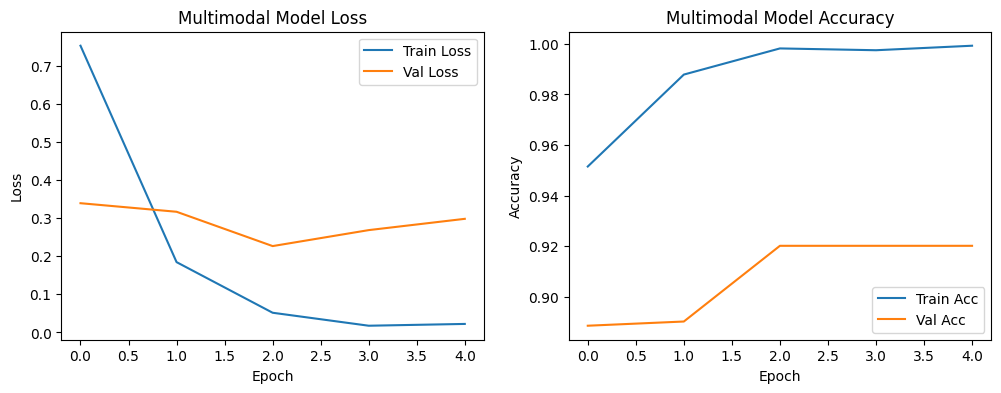

Test Accuracy: 0.9153
Classification Report:
                    precision    recall  f1-score   support

Economy & Business       0.90      0.91      0.90       107
            Sports       0.99      0.89      0.94       103
        Technology       0.90      0.99      0.94        89
     Entertainment       0.93      0.86      0.89        91
          Politics       0.85      0.97      0.91       109
Health & Lifestyle       0.95      0.87      0.91       103

          accuracy                           0.92       602
         macro avg       0.92      0.92      0.92       602
      weighted avg       0.92      0.92      0.92       602



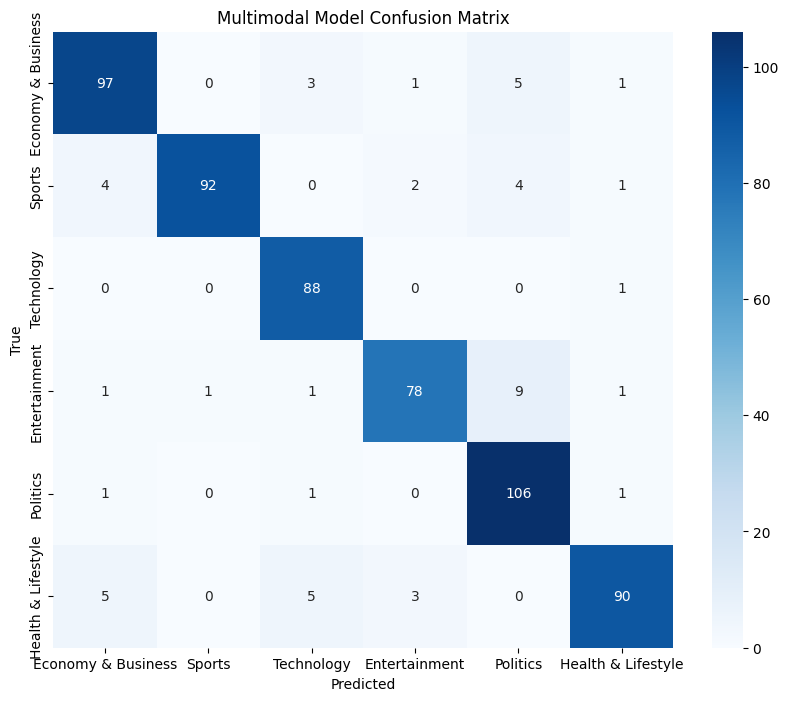

Model saved!


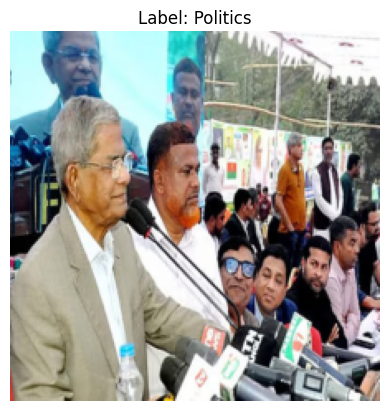

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from transformers import AutoTokenizer, AutoModel
from PIL import Image
import torchvision.transforms as transforms
import torchvision.models as models
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import Dataset, DataLoader, random_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import drive
import pandas as pd
import os

# Mount Google Drive (comment out if already mounted)
drive.mount('/content/drive')

# Paths
csv_path = '/content/drive/MyDrive/BanglaNewsClassifier/headlines.csv'
image_folder = '/content/drive/MyDrive/BanglaNewsClassifier/Images/'

# Load and filter CSV
df = pd.read_csv(csv_path)
df['full_image_path'] = df['Image_Path'].apply(lambda x: f"{image_folder}{x}")

def test_image(image_path):
    try:
        img = Image.open(image_path).convert('RGB')
        img.verify()
        return True
    except:
        return False

df = df[df['full_image_path'].apply(lambda x: os.path.exists(x) and test_image(x))]
df = df.drop_duplicates(subset=['Image_Path'])
print(f"Valid samples: {len(df)}")

# Preprocess data
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Text preprocessing
tokenizer = AutoTokenizer.from_pretrained('sagorsarker/bangla-bert-base')
tokenized_headlines = tokenizer(df['Heading(Bangla)'].tolist(), padding=True, truncation=True, max_length=128, return_tensors='pt')

# Labels
le = LabelEncoder()
labels = le.fit_transform(df['Category(Bangla)'])
labels = torch.tensor(labels, dtype=torch.long)

# Map Bangla categories to English for display
category_mapping = {
    'রাজনীতি': 'Politics',
    'খেলাধুলা': 'Sports',
    'অর্থনীতি ও বাণিজ্য': 'Economy & Business',
    'বিনোদন': 'Entertainment',
    'প্রযুক্তি': 'Technology',
    'স্বাস্থ্য ও জীবনযাপন': 'Health & Lifestyle'
}
le_classes = [category_mapping.get(cls, cls) for cls in le.classes_]
print("Display classes (English):", le_classes)

# Dataset
class BanglaNewsDataset(Dataset):
    def __init__(self, tokenized_headlines, image_paths, labels, transform):
        self.input_ids = tokenized_headlines['input_ids']
        self.attention_mask = tokenized_headlines['attention_mask']
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        img = Image.open(self.image_paths[idx]).convert('RGB')
        img = self.transform(img)
        return {
            'input_ids': self.input_ids[idx],
            'attention_mask': self.attention_mask[idx],
            'images': img,
            'labels': self.labels[idx]
        }

# Split dataset into 70% train, 15% validation, 15% test
dataset = BanglaNewsDataset(tokenized_headlines, df['full_image_path'].tolist(), labels, transform)
train_size = int(0.7 * len(dataset))
val_size = int(0.15 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=8 if len(df) > 1000 else 4, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8 if len(df) > 1000 else 4)
test_loader = DataLoader(test_dataset, batch_size=8 if len(df) > 1000 else 4)

# Model
class MultimodalNewsClassifier(nn.Module):
    def __init__(self, num_classes):
        super(MultimodalNewsClassifier, self).__init__()
        self.text_model = AutoModel.from_pretrained('sagorsarker/bangla-bert-base')
        self.image_model = models.vit_b_16(weights='IMAGENET1K_V1')  # Replace ResNet18 with ViT
        self.image_model.heads.head = nn.Linear(self.image_model.heads.head.in_features, 512)  # Adjust head to 512
        self.fusion = nn.Linear(768 + 512, 256)
        self.dropout = nn.Dropout(0.3)
        self.classifier = nn.Linear(256, num_classes)

    def forward(self, input_ids, attention_mask, images):
        text_outputs = self.text_model(input_ids=input_ids, attention_mask=attention_mask)
        text_features = text_outputs.pooler_output
        image_features = self.image_model(images)  # ViT output
        combined = torch.cat((text_features, image_features), dim=1)
        fused = torch.relu(self.fusion(combined))
        fused = self.dropout(fused)
        logits = self.classifier(fused)
        return logits

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = MultimodalNewsClassifier(num_classes=len(le.classes_)).to(device)

# Training
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=2e-5)

def train_epoch(model, data_loader, criterion, optimizer, device):
    model.train()
    total_loss = 0
    for batch in data_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        images = batch['images'].to(device)
        labels = batch['labels'].to(device)
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask, images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(data_loader)

def evaluate(model, data_loader, criterion, device, return_preds=False):
    model.eval()
    total_loss = 0
    correct = 0
    total = 0
    preds_all, labels_all = [], []
    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            images = batch['images'].to(device)
            labels = batch['labels'].to(device)
            outputs = model(input_ids, attention_mask, images)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            _, preds = torch.max(outputs, dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
            preds_all.extend(preds.cpu().numpy())
            labels_all.extend(labels.cpu().numpy())
    accuracy = correct / total
    avg_loss = total_loss / len(data_loader)
    if return_preds:
        return avg_loss, accuracy, preds_all, labels_all
    return avg_loss, accuracy

# Training loop with validation
train_losses, val_losses = [], []
train_accs, val_accs = [], []

for epoch in range(5 if len(df) > 1000 else 10):
    train_loss = train_epoch(model, train_loader, criterion, optimizer, device)
    val_loss, val_acc = evaluate(model, val_loader, criterion, device)

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accs.append(evaluate(model, train_loader, criterion, device)[1])
    val_accs.append(val_acc)

    print(f"Epoch {epoch+1}:")
    print(f"Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")
    print(f"Train Acc: {train_accs[-1]:.4f}, Val Acc: {val_accs[-1]:.4f}")

# Plot training curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Multimodal Model Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accs, label='Train Acc')
plt.plot(val_accs, label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Multimodal Model Accuracy')
plt.legend()
plt.show()

# Test evaluation
test_loss, test_acc, preds, true_labels = evaluate(model, test_loader, criterion, device, return_preds=True)
print(f"Test Accuracy: {test_acc:.4f}")
print("Classification Report:")
print(classification_report(true_labels, preds, target_names=le_classes))

# Confusion Matrix
cm = confusion_matrix(true_labels, preds)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le_classes, yticklabels=le_classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Multimodal Model Confusion Matrix')
plt.show()

# Save Model
torch.save(model.state_dict(), '/content/drive/MyDrive/BanglaNewsClassifier/multimodal_news_model.pth')
print("Model saved!")

# Visualize Sample
def show_image(image_path, idx):
    img = Image.open(image_path).convert('RGB')
    img = transform(img).permute(1, 2, 0)
    img = img * torch.tensor([0.229, 0.224, 0.225]) + torch.tensor([0.485, 0.456, 0.406])
    plt.imshow(img.clip(0, 1))
    bangla_label = le.inverse_transform([labels[idx]])[0]
    english_label = category_mapping.get(bangla_label, bangla_label)
    plt.title(f"Label: {english_label}")
    plt.axis('off')
    plt.show()

show_image(df['full_image_path'].iloc[0], 0)

#BanglaBERT+Resnet18 + Early Fusion.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from transformers import AutoTokenizer, AutoModel
from PIL import Image
import torchvision.transforms as transforms
import torchvision.models as models
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import Dataset, DataLoader, random_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import drive
import pandas as pd
import os

# Mount Google Drive (comment out if already mounted)
drive.mount('/content/drive')

# Paths
csv_path = '/content/drive/MyDrive/BanglaNewsClassifier/headlines.csv'
image_folder = '/content/drive/MyDrive/BanglaNewsClassifier/Images/'

# Load and filter CSV
df = pd.read_csv(csv_path)
df['full_image_path'] = df['Image_Path'].apply(lambda x: f"{image_folder}{x}")

def test_image(image_path):
    try:
        img = Image.open(image_path).convert('RGB')
        img.verify()
        return True
    except:
        return False

df = df[df['full_image_path'].apply(lambda x: os.path.exists(x) and test_image(x))]
df = df.drop_duplicates(subset=['Image_Path'])
print(f"Valid samples: {len(df)}")

# Preprocess data
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Text preprocessing
tokenizer = AutoTokenizer.from_pretrained('sagorsarker/bangla-bert-base')
tokenized_headlines = tokenizer(df['Heading(Bangla)'].tolist(), padding=True, truncation=True, max_length=128, return_tensors='pt')

# Labels
le = LabelEncoder()
labels = le.fit_transform(df['Category(Bangla)'])
labels = torch.tensor(labels, dtype=torch.long)

# Map Bangla categories to English for display
category_mapping = {
    'রাজনীতি': 'Politics',
    'খেলাধুলা': 'Sports',
    'অর্থনীতি ও বাণিজ্য': 'Economy & Business',
    'বিনোদন': 'Entertainment',
    'প্রযুক্তি': 'Technology',
    'স্বাস্থ্য ও জীবনযাপন': 'Health & Lifestyle'
}
le_classes = [category_mapping.get(cls, cls) for cls in le.classes_]
print("Display classes (English):", le_classes)

# Dataset
class BanglaNewsDataset(Dataset):
    def __init__(self, tokenized_headlines, image_paths, labels, transform):
        self.input_ids = tokenized_headlines['input_ids']
        self.attention_mask = tokenized_headlines['attention_mask']
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        img = Image.open(self.image_paths[idx]).convert('RGB')
        img = self.transform(img)
        return {
            'input_ids': self.input_ids[idx],
            'attention_mask': self.attention_mask[idx],
            'images': img,
            'labels': self.labels[idx]
        }

# Split dataset into 70% train, 15% validation, 15% test
dataset = BanglaNewsDataset(tokenized_headlines, df['full_image_path'].tolist(), labels, transform)
train_size = int(0.7 * len(dataset))
val_size = int(0.15 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=8 if len(df) > 1000 else 4, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8 if len(df) > 1000 else 4)
test_loader = DataLoader(test_dataset, batch_size=8 if len(df) > 1000 else 4)

# Model
class MultimodalNewsClassifier(nn.Module):
    def __init__(self, num_classes):
        super(MultimodalNewsClassifier, self).__init__()
        self.text_model = AutoModel.from_pretrained('sagorsarker/bangla-bert-base')
        self.image_model = models.resnet18(weights='IMAGENET1K_V1')
        self.image_model.fc = nn.Linear(self.image_model.fc.in_features, 512)
        self.fusion = nn.Linear(768 + 512, 256)
        self.dropout = nn.Dropout(0.3)
        self.classifier = nn.Linear(256, num_classes)

    def forward(self, input_ids, attention_mask, images):
        text_outputs = self.text_model(input_ids=input_ids, attention_mask=attention_mask)
        text_features = text_outputs.pooler_output
        image_features = self.image_model(images)
        combined = torch.cat((text_features, image_features), dim=1)
        fused = torch.relu(self.fusion(combined))
        fused = self.dropout(fused)
        logits = self.classifier(fused)
        return logits

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = MultimodalNewsClassifier(num_classes=len(le.classes_)).to(device)

# Training
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=2e-5)

def train_epoch(model, data_loader, criterion, optimizer, device):
    model.train()
    total_loss = 0
    for batch in data_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        images = batch['images'].to(device)
        labels = batch['labels'].to(device)
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask, images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(data_loader)

def evaluate(model, data_loader, criterion, device, return_preds=False):
    model.eval()
    total_loss = 0
    correct = 0
    total = 0
    preds_all, labels_all = [], []
    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            images = batch['images'].to(device)
            labels = batch['labels'].to(device)
            outputs = model(input_ids, attention_mask, images)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            _, preds = torch.max(outputs, dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
            preds_all.extend(preds.cpu().numpy())
            labels_all.extend(labels.cpu().numpy())
    accuracy = correct / total
    avg_loss = total_loss / len(data_loader)
    if return_preds:
        return avg_loss, accuracy, preds_all, labels_all
    return avg_loss, accuracy

# Training loop with validation
train_losses, val_losses = [], []
train_accs, val_accs = [], []

for epoch in range(5 if len(df) > 1000 else 10):
    train_loss = train_epoch(model, train_loader, criterion, optimizer, device)
    val_loss, val_acc = evaluate(model, val_loader, criterion, device)

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accs.append(evaluate(model, train_loader, criterion, device)[1])
    val_accs.append(val_acc)

    print(f"Epoch {epoch+1}:")
    print(f"Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")
    print(f"Train Acc: {train_accs[-1]:.4f}, Val Acc: {val_acc:.4f}")

# Plot training curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Multimodal Model Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accs, label='Train Acc')
plt.plot(val_accs, label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Multimodal Model Accuracy')
plt.legend()
plt.show()

# Test evaluation
test_loss, test_acc, preds, true_labels = evaluate(model, test_loader, criterion, device, return_preds=True)
print(f"Test Accuracy: {test_acc:.4f}")
print("Classification Report:")
print(classification_report(true_labels, preds, target_names=le_classes))

# Confusion Matrix
cm = confusion_matrix(true_labels, preds)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le_classes, yticklabels=le_classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Multimodal Model Confusion Matrix')
plt.show()

# Save Model
torch.save(model.state_dict(), '/content/drive/MyDrive/BanglaNewsClassifier/multimodal_news_model.pth')
print("Model saved!")

# Visualize Sample
def show_image(image_path, idx):
    img = Image.open(image_path).convert('RGB')
    img = transform(img).permute(1, 2, 0)
    img = img * torch.tensor([0.229, 0.224, 0.225]) + torch.tensor([0.485, 0.456, 0.406])
    plt.imshow(img.clip(0, 1))
    bangla_label = le.inverse_transform([labels[idx]])[0]
    english_label = category_mapping.get(bangla_label, bangla_label)
    plt.title(f"Label: {english_label}")
    plt.axis('off')
    plt.show()

show_image(df['full_image_path'].iloc[0], 0)

Mounted at /content/drive


#Late Fusion


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Valid samples: 4007


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/491 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Display classes (English): ['Economy & Business', 'Sports', 'Technology', 'Entertainment', 'Politics', 'Health & Lifestyle']


model.safetensors:   0%|          | 0.00/660M [00:00<?, ?B/s]

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 186MB/s]
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


Epoch 1:
Train Loss: 0.7167, Val Loss: 0.3323
Train Acc: 0.9558, Val Acc: 0.9018
Epoch 2:
Train Loss: 0.1990, Val Loss: 0.2795
Train Acc: 0.9907, Val Acc: 0.9185
Epoch 3:
Train Loss: 0.0813, Val Loss: 0.3278
Train Acc: 0.9950, Val Acc: 0.9052
Epoch 4:
Train Loss: 0.0388, Val Loss: 0.3265
Train Acc: 0.9943, Val Acc: 0.9151
Epoch 5:
Train Loss: 0.0291, Val Loss: 0.3638
Train Acc: 0.9950, Val Acc: 0.8918


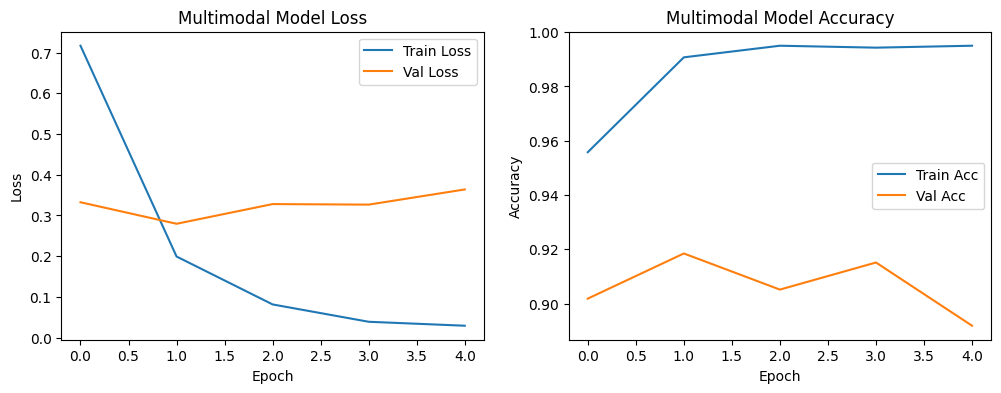

Test Accuracy: 0.9070
Classification Report:
                    precision    recall  f1-score   support

Economy & Business       0.92      0.86      0.89        96
            Sports       0.94      0.94      0.94       103
        Technology       0.95      0.87      0.91       105
     Entertainment       0.97      0.88      0.92       108
          Politics       0.92      0.99      0.95        94
Health & Lifestyle       0.76      0.91      0.83        96

          accuracy                           0.91       602
         macro avg       0.91      0.91      0.91       602
      weighted avg       0.91      0.91      0.91       602



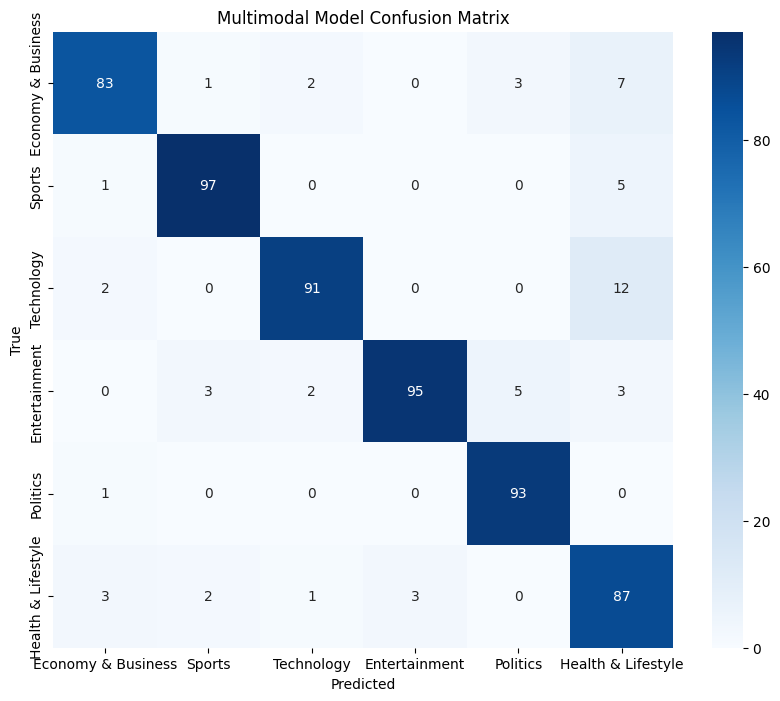

Model saved!


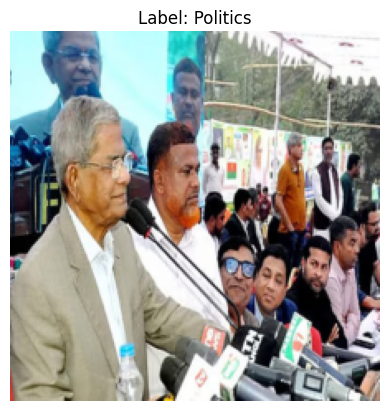

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from transformers import AutoTokenizer, AutoModel
from PIL import Image
import torchvision.transforms as transforms
import torchvision.models as models
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import Dataset, DataLoader, random_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import drive
import pandas as pd
import os

# Mount Google Drive (comment out if already mounted)
drive.mount('/content/drive')

# Paths
csv_path = '/content/drive/MyDrive/BanglaNewsClassifier/headlines.csv'
image_folder = '/content/drive/MyDrive/BanglaNewsClassifier/Images/'

# Load and filter CSV
df = pd.read_csv(csv_path)
df['full_image_path'] = df['Image_Path'].apply(lambda x: f"{image_folder}{x}")

def test_image(image_path):
    try:
        img = Image.open(image_path).convert('RGB')
        img.verify()
        return True
    except:
        return False

df = df[df['full_image_path'].apply(lambda x: os.path.exists(x) and test_image(x))]
df = df.drop_duplicates(subset=['Image_Path'])
print(f"Valid samples: {len(df)}")

# Preprocess data
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Text preprocessing
tokenizer = AutoTokenizer.from_pretrained('sagorsarker/bangla-bert-base')
tokenized_headlines = tokenizer(df['Heading(Bangla)'].tolist(), padding=True, truncation=True, max_length=128, return_tensors='pt')

# Labels
le = LabelEncoder()
labels = le.fit_transform(df['Category(Bangla)'])
labels = torch.tensor(labels, dtype=torch.long)

# Map Bangla categories to English for display
category_mapping = {
    'রাজনীতি': 'Politics',
    'খেলাধুলা': 'Sports',
    'অর্থনীতি ও বাণিজ্য': 'Economy & Business',
    'বিনোদন': 'Entertainment',
    'প্রযুক্তি': 'Technology',
    'স্বাস্থ্য ও জীবনযাপন': 'Health & Lifestyle'
}
le_classes = [category_mapping.get(cls, cls) for cls in le.classes_]
print("Display classes (English):", le_classes)

# Dataset
class BanglaNewsDataset(Dataset):
    def __init__(self, tokenized_headlines, image_paths, labels, transform):
        self.input_ids = tokenized_headlines['input_ids']
        self.attention_mask = tokenized_headlines['attention_mask']
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        img = Image.open(self.image_paths[idx]).convert('RGB')
        img = self.transform(img)
        return {
            'input_ids': self.input_ids[idx],
            'attention_mask': self.attention_mask[idx],
            'images': img,
            'labels': self.labels[idx]
        }

# Split dataset into 70% train, 15% validation, 15% test
dataset = BanglaNewsDataset(tokenized_headlines, df['full_image_path'].tolist(), labels, transform)
train_size = int(0.7 * len(dataset))
val_size = int(0.15 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=8 if len(df) > 1000 else 4, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8 if len(df) > 1000 else 4)
test_loader = DataLoader(test_dataset, batch_size=8 if len(df) > 1000 else 4)

# Models
class TextClassifier(nn.Module):
    def __init__(self, num_classes):
        super(TextClassifier, self).__init__()
        self.bert = AutoModel.from_pretrained('sagorsarker/bangla-bert-base')
        self.dropout = nn.Dropout(0.3)
        self.classifier = nn.Linear(768, num_classes)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output
        pooled_output = self.dropout(pooled_output)
        logits = self.classifier(pooled_output)
        return logits

class ImageClassifier(nn.Module):
    def __init__(self, num_classes):
        super(ImageClassifier, self).__init__()
        self.resnet = models.resnet18(weights='IMAGENET1K_V1')
        self.resnet.fc = nn.Linear(self.resnet.fc.in_features, 512)
        self.dropout = nn.Dropout(0.3)
        self.classifier = nn.Linear(512, num_classes)

    def forward(self, images):
        features = self.resnet(images)
        features = self.dropout(features)
        logits = self.classifier(features)
        return logits

class MultimodalNewsClassifier(nn.Module):
    def __init__(self, num_classes):
        super(MultimodalNewsClassifier, self).__init__()
        self.text_model = TextClassifier(num_classes)
        self.image_model = ImageClassifier(num_classes)
        self.fusion_weight = nn.Parameter(torch.tensor(0.5))  # Learnable weight for averaging

    def forward(self, input_ids, attention_mask, images):
        text_logits = self.text_model(input_ids, attention_mask)
        image_logits = self.image_model(images)
        # Weighted average of logits
        fused_logits = self.fusion_weight * text_logits + (1 - self.fusion_weight) * image_logits
        return fused_logits

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = MultimodalNewsClassifier(num_classes=len(le.classes_)).to(device)

# Training
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=2e-5)

def train_epoch(model, data_loader, criterion, optimizer, device):
    model.train()
    total_loss = 0
    for batch in data_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        images = batch['images'].to(device)
        labels = batch['labels'].to(device)
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask, images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(data_loader)

def evaluate(model, data_loader, criterion, device, return_preds=False):
    model.eval()
    total_loss = 0
    correct = 0
    total = 0
    preds_all, labels_all = [], []
    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            images = batch['images'].to(device)
            labels = batch['labels'].to(device)
            outputs = model(input_ids, attention_mask, images)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            _, preds = torch.max(outputs, dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
            preds_all.extend(preds.cpu().numpy())
            labels_all.extend(labels.cpu().numpy())
    accuracy = correct / total
    avg_loss = total_loss / len(data_loader)
    if return_preds:
        return avg_loss, accuracy, preds_all, labels_all
    return avg_loss, accuracy

# Training loop with validation
train_losses, val_losses = [], []
train_accs, val_accs = [], []

for epoch in range(5 if len(df) > 1000 else 10):
    train_loss = train_epoch(model, train_loader, criterion, optimizer, device)
    val_loss, val_acc = evaluate(model, val_loader, criterion, device)

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accs.append(evaluate(model, train_loader, criterion, device)[1])
    val_accs.append(val_acc)

    print(f"Epoch {epoch+1}:")
    print(f"Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")
    print(f"Train Acc: {train_accs[-1]:.4f}, Val Acc: {val_accs[-1]:.4f}")

# Plot training curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Multimodal Model Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accs, label='Train Acc')
plt.plot(val_accs, label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Multimodal Model Accuracy')
plt.legend()
plt.show()

# Test evaluation
test_loss, test_acc, preds, true_labels = evaluate(model, test_loader, criterion, device, return_preds=True)
print(f"Test Accuracy: {test_acc:.4f}")
print("Classification Report:")
print(classification_report(true_labels, preds, target_names=le_classes))

# Confusion Matrix
cm = confusion_matrix(true_labels, preds)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le_classes, yticklabels=le_classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Multimodal Model Confusion Matrix')
plt.show()

# Save Model
torch.save(model.state_dict(), '/content/drive/MyDrive/BanglaNewsClassifier/multimodal_news_model.pth')
print("Model saved!")

# Visualize Sample
def show_image(image_path, idx):
    img = Image.open(image_path).convert('RGB')
    img = transform(img).permute(1, 2, 0)
    img = img * torch.tensor([0.229, 0.224, 0.225]) + torch.tensor([0.485, 0.456, 0.406])
    plt.imshow(img.clip(0, 1))
    bangla_label = le.inverse_transform([labels[idx]])[0]
    english_label = category_mapping.get(bangla_label, bangla_label)
    plt.title(f"Label: {english_label}")
    plt.axis('off')
    plt.show()

show_image(df['full_image_path'].iloc[0], 0)

In [ ]:
model.load_state_dict(torch.load('/content/drive/MyDrive/BanglaNewsClassifier/multimodal_news_model.pth'))
model.eval()

MultimodalNewsClassifier(
  (text_model): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(102025, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=

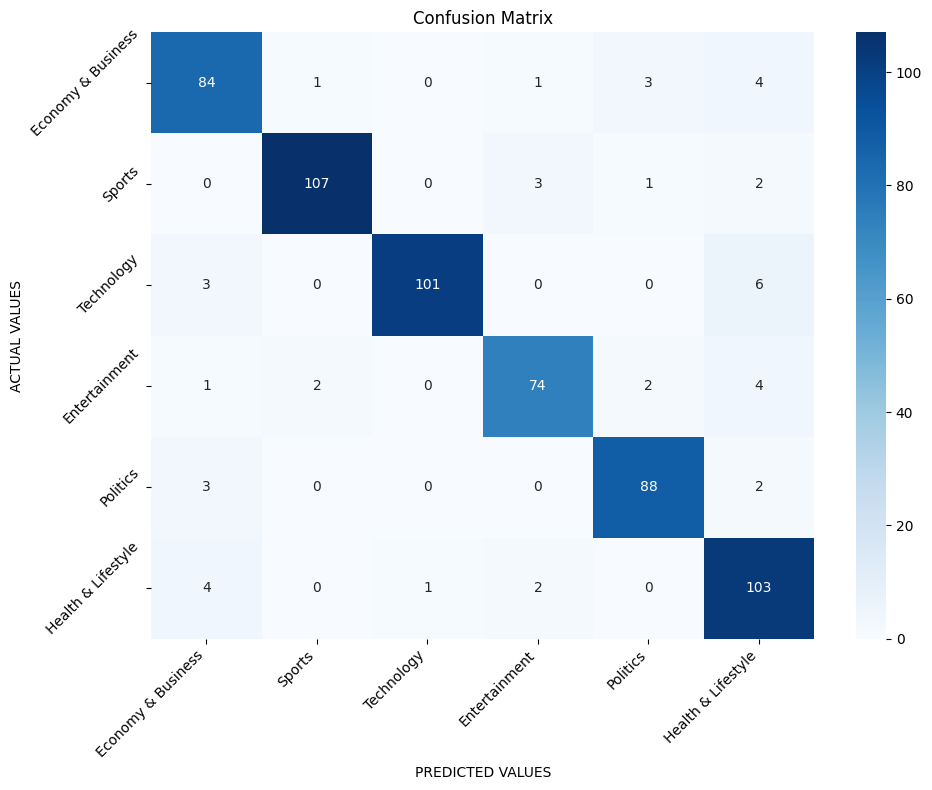

In [ ]:
cm = confusion_matrix(true_labels, preds)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le_classes, yticklabels=le_classes)
plt.xlabel('PREDICTED VALUES')
plt.ylabel('ACTUAL VALUES')
plt.title('Confusion Matrix')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels by 45 degrees
plt.yticks(rotation=45)  # Rotate y-axis labels by 45 degrees
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()